# **🍽️ Restaurant Tips Analysis**

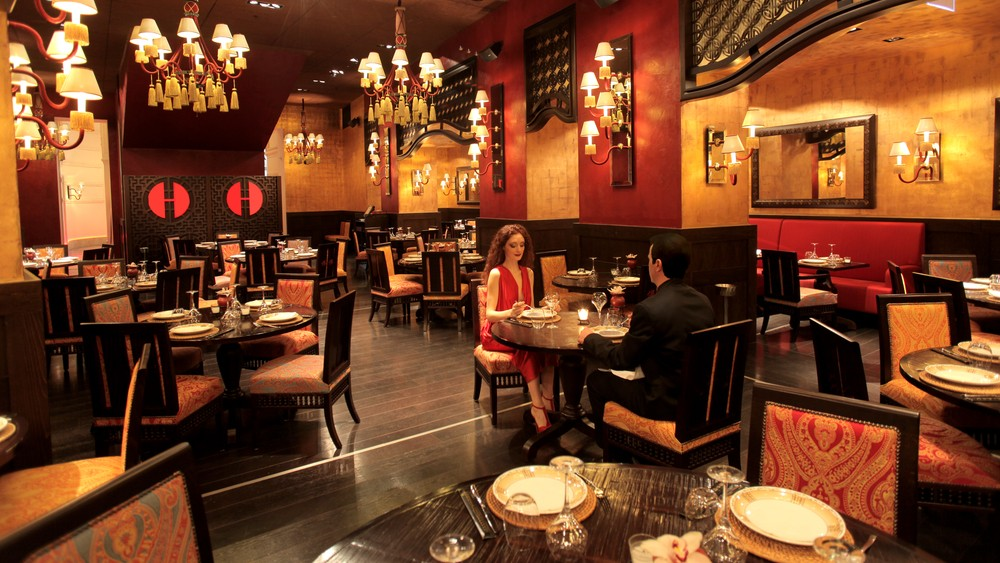

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [83]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [84]:
# PUT YOUR CODE HERE
df=pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [85]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [86]:
# PUT YOUR CODE HERE
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

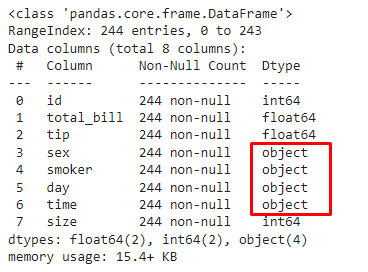

Let's fix their types and make them string:

In [87]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [88]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [89]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [90]:
# PUT YOUR CODE HERE
smokers_df=df[df['smoker']=='Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [91]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
218,218,7.74,1.44,Male,Yes,Sat,Dinner,2
203,203,16.4,2.5,Female,Yes,Thur,Lunch,2
181,181,23.33,5.65,Male,Yes,Sun,Dinner,2
219,219,30.14,3.09,Female,Yes,Sat,Dinner,4
193,193,15.48,2.02,Male,Yes,Thur,Lunch,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [92]:
# PUT YOUR CODE HERE
non_smokers_df=df[df['smoker']=='No']

Check whether everything is okay. Output a test sample (5 random rows):

In [93]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
22,22,15.77,2.23,Female,No,Sat,Dinner,2
228,228,13.28,2.72,Male,No,Sat,Dinner,2
147,147,11.87,1.63,Female,No,Thur,Lunch,2
23,23,39.42,7.58,Male,No,Sat,Dinner,4
233,233,10.77,1.47,Male,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [94]:
# YOUR CODE
common_tip_min=df['tip'].min()
common_tip_max=df['tip'].max()
common_tip_mean=df['tip'].mean()
common_tip_median=df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [95]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [96]:
# YOUR CODE
smokers_tip_min=smokers_df['tip'].min()
smokers_tip_max=smokers_df['tip'].max()
smokers_tip_mean=smokers_df['tip'].mean()
smokers_tip_median=smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [97]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [98]:
# YOUR CODE
non_smokers_tip_min=non_smokers_df['tip'].min()
non_smokers_tip_max=non_smokers_df['tip'].max()
non_smokers_tip_mean=non_smokers_df['tip'].mean()
non_smokers_tip_median=non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [99]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [100]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. The difference of tipping behavior between smokers and non-smokers was negligible.
2. The max tip of smokers was higher than that of non-smokers.

**General conclusion:**
Overall, smoking behavior did not directly affect the tip, but the smokers tended to give more tip in half of the distribution.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

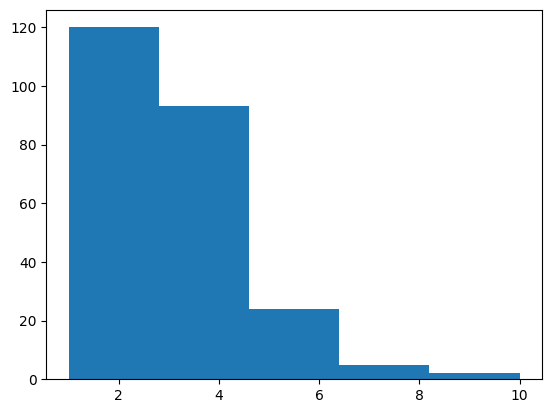

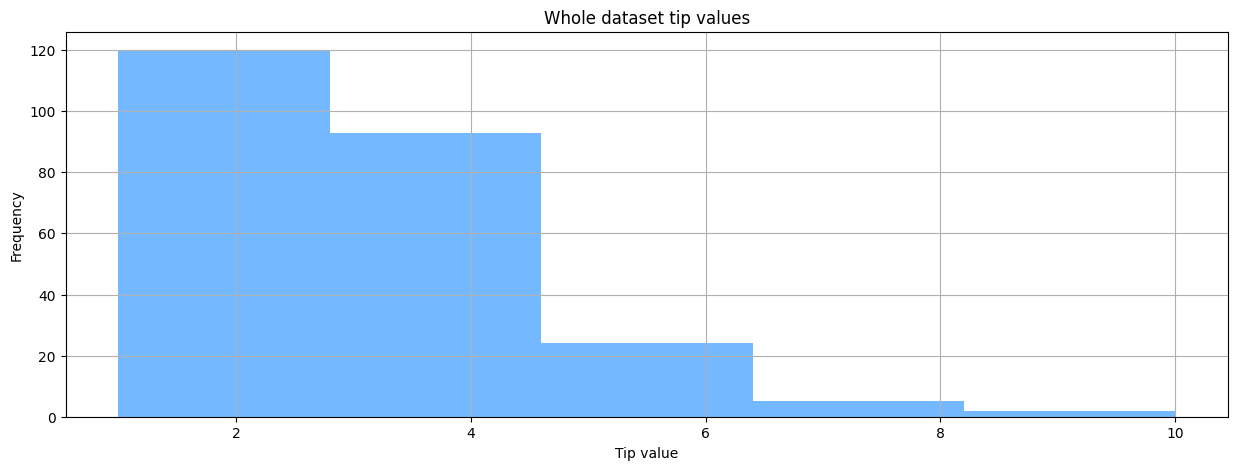

In [101]:
# YOUR CODE
plt.hist(df.tip, bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(df.tip, bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

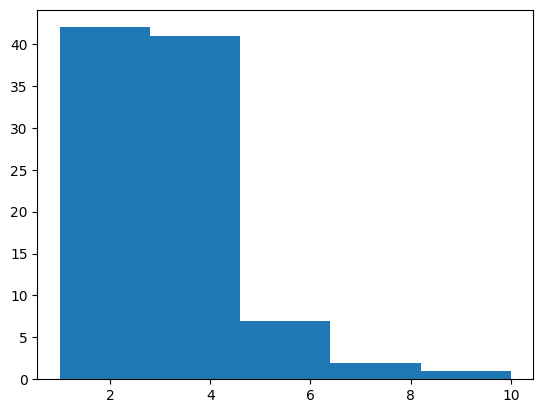

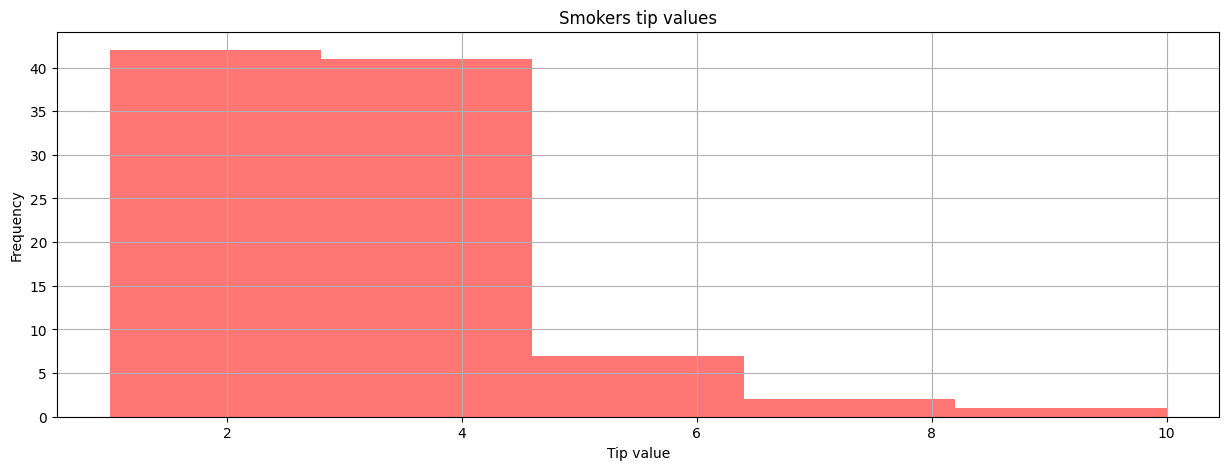

In [102]:
# YOUR CODE
plt.hist(smokers_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(smokers_df['tip'], bins = 5, color = '#ff7675')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

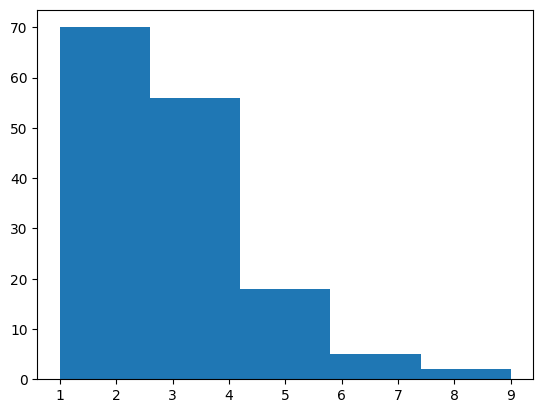

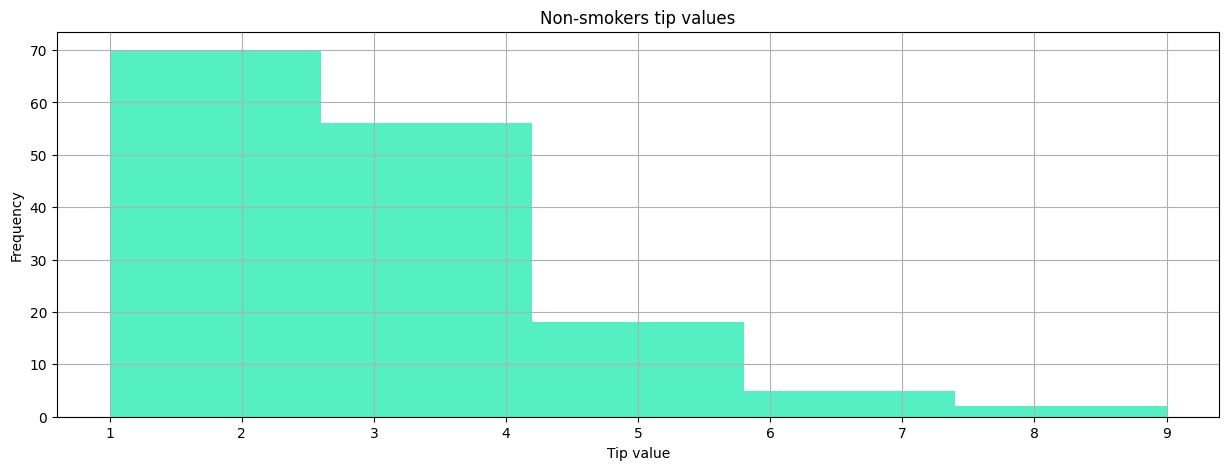

In [103]:
# YOUR CODE
plt.hist(non_smokers_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(non_smokers_df['tip'], bins = 5, color = '#55efc4')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

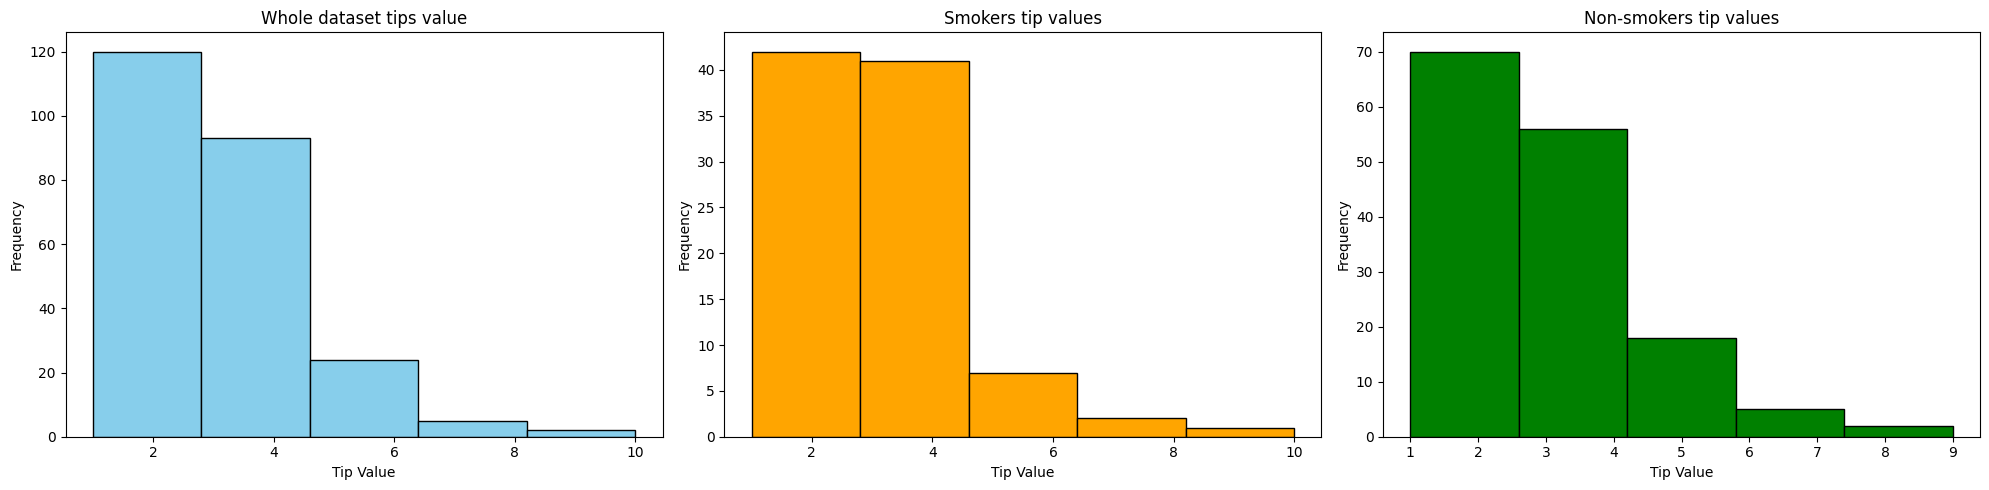

In [104]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot for all tips
axs[0].hist(df.tip, bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Whole dataset tips value')
axs[0].set_xlabel('Tip Value')
axs[0].set_ylabel('Frequency')


# Plot for smokers
axs[1].hist(smokers_df['tip'], bins=5, color='orange', edgecolor='black')
axs[1].set_title('Smokers tip values')
axs[1].set_xlabel('Tip Value')
axs[1].set_ylabel('Frequency')

# Plot for non-smokers
axs[2].hist(non_smokers_df['tip'], bins=5, color='green', edgecolor='black')
axs[2].set_title('Non-smokers tip values')
axs[2].set_xlabel('Tip Value')
axs[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. There were more tipping instances recorded from non-smokers than from smokers in the dataset.

**General conclusion:**
Although smokers tended to tip higher at the median and maximum, non-smokers were more numerous and contributed the majority of tip frequencies in the dataset.

### **👨👩 Do males give more tips?**

Let's figure out the difference between males and females in terms of their behavior and purchasing habits in public catering establishments.

Perform the same steps based on the column **sex**.

#### **Separate males and felmales**

###### **Males**

Create a new dataframe males_df containing only info about males.

In [105]:
males_df=df[df['sex']=='Male']

Check whether everything is okay. Output a test sample (5 random rows):

In [106]:
males_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
193,193,15.48,2.02,Male,Yes,Thur,Lunch,2
56,56,38.01,3.0,Male,Yes,Sat,Dinner,4
216,216,28.15,3.0,Male,Yes,Sat,Dinner,5
28,28,21.7,4.3,Male,No,Sat,Dinner,2
64,64,17.59,2.64,Male,No,Sat,Dinner,3


##### **Females**

Create a new dataframe females_df containing only info about females.

In [107]:
females_df=df[df['sex']=='Female']

Check whether everything is okay. Output a test sample (5 random rows):

In [108]:
females_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2
155,155,29.85,5.14,Female,No,Sun,Dinner,5
92,92,5.75,1.0,Female,Yes,Fri,Dinner,2
139,139,13.16,2.75,Female,No,Thur,Lunch,2
145,145,8.35,1.5,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

##### **Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [109]:
common_tip_min=df['tip'].min()
common_tip_max=df['tip'].max()
common_tip_mean=df['tip'].mean()
common_tip_median=df['tip'].median()

Let's show the resulting values for whole dataset

In [110]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **Males**

Do the same taking into account only smokers. Use the following variables:

* min => `males_tip_min`
* max => `males_tip_max`
* mean => `males_tip_mean`
* median => `males_tip_median`

In [111]:
males_tip_min=males_df['tip'].min()
males_tip_max=males_df['tip'].max()
males_tip_mean=males_df['tip'].mean()
males_tip_median=males_df['tip'].median()

Let's show the resulting values for males

In [112]:
# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
males_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **Females**

Do the same taking into account only smokers. Use the following variables:

* min => `females_tip_min`
* max => `females_tip_max`
* mean => `females_tip_mean`
* median => `females_tip_median`

In [113]:
females_tip_min=females_df['tip'].min()
females_tip_max=females_df['tip'].max()
females_tip_mean=females_df['tip'].mean()
females_tip_median=females_df['tip'].median()

Let's show the resulting values for females


In [114]:
# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
females_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **Conclusions**

Let's show the retrieved results together

In [115]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

---

1. Males had a higher mean tip than females. --> Males tended to give more tips than females.

2. The max tip of males was significantly higher than that of females.

3. The distribution of tips for males is skewed to the right, suggesting that males tend to give higher tips than females.

#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

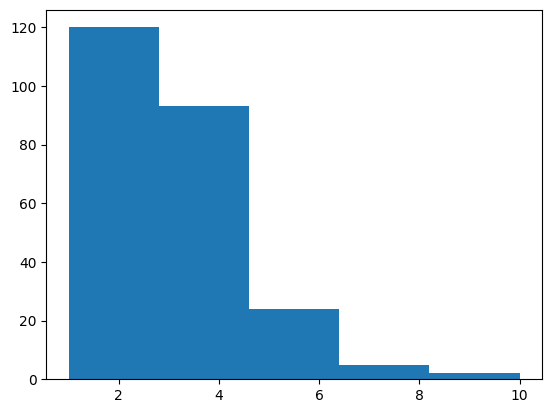

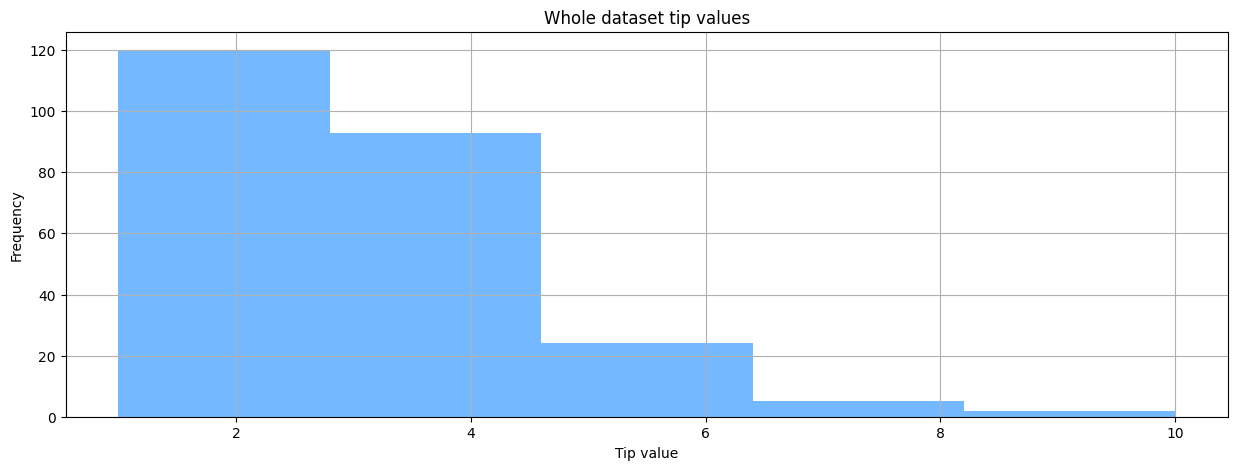

In [116]:
# YOUR CODE
plt.hist(df.tip, bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(df.tip, bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Male tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

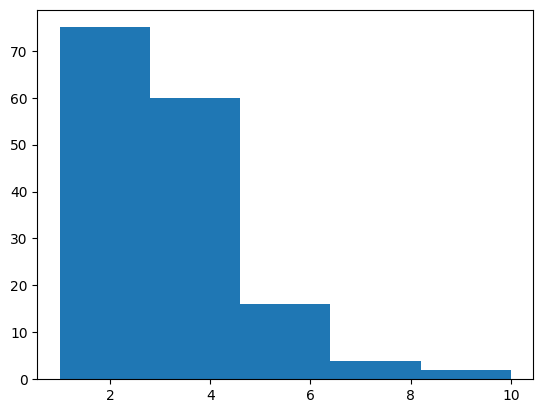

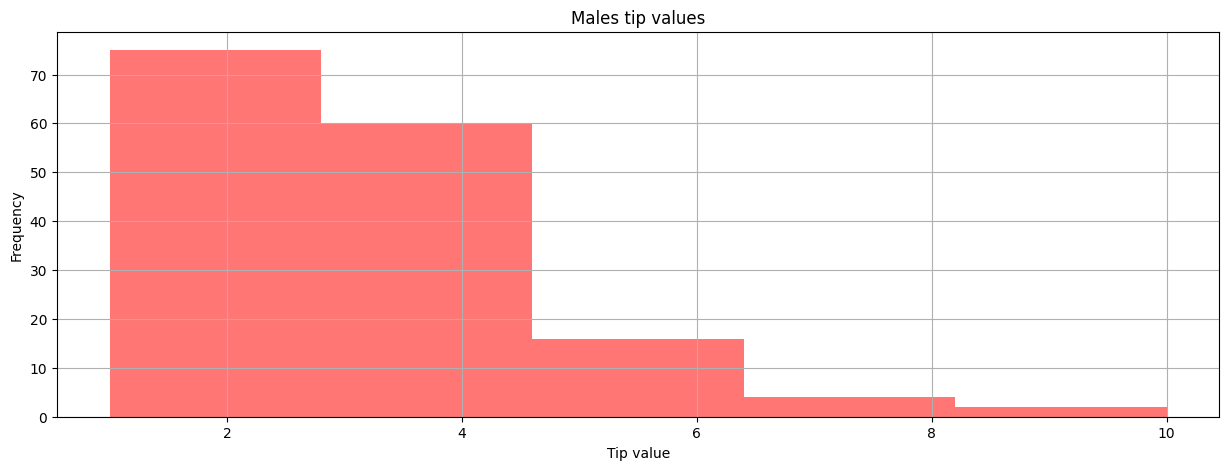

In [117]:
# YOUR CODE
plt.hist(males_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(males_df['tip'], bins = 5, color = '#ff7675')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Female tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Females tip values`
* Gridlines: `show`

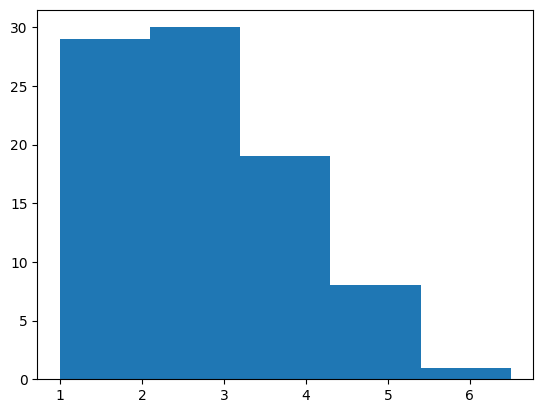

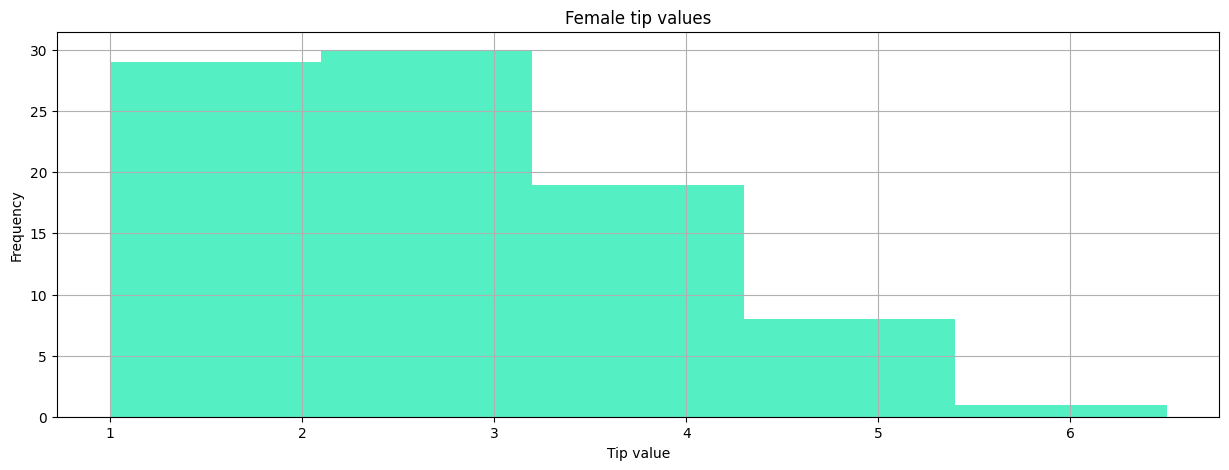

In [118]:
# YOUR CODE
plt.hist(females_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(females_df['tip'], bins = 5, color = '#55efc4')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Conclusion**


Plot all 3 charts in a row in the same cell:

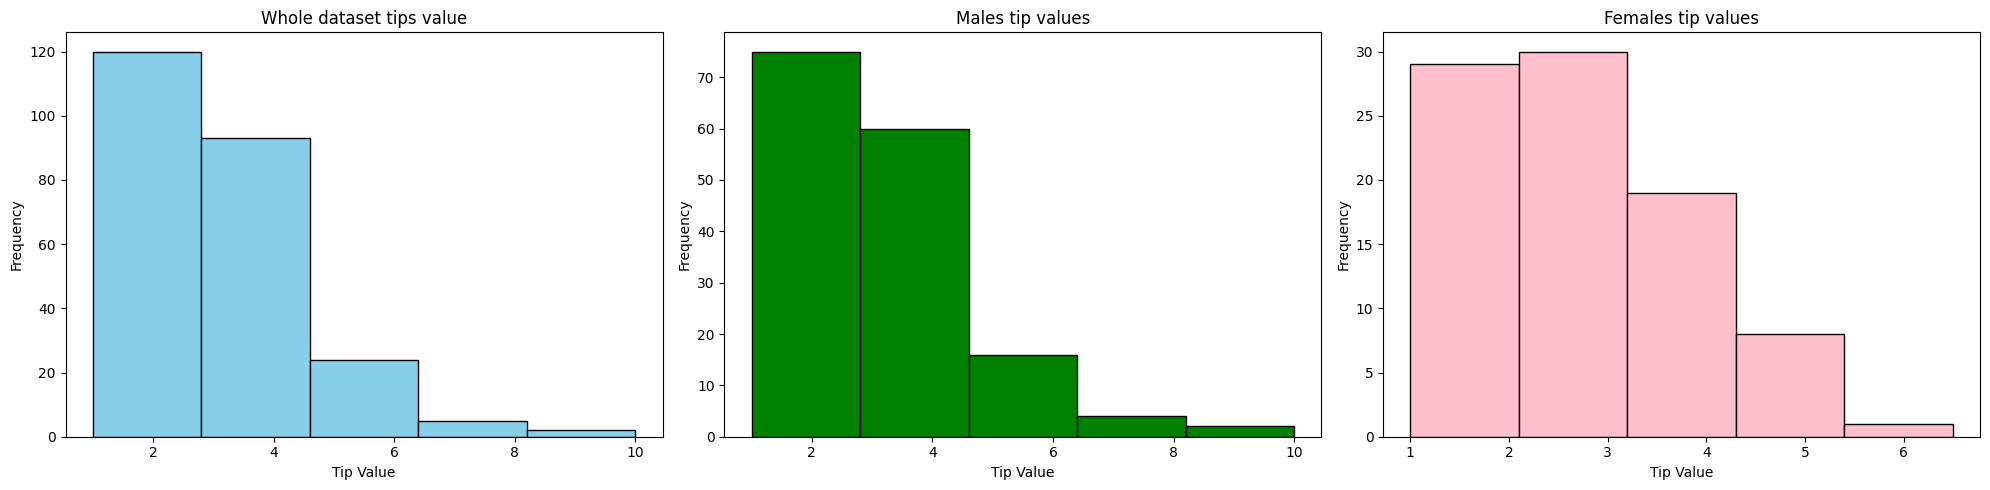

In [119]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot for all tips
axs[0].hist(df.tip, bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Whole dataset tips value')
axs[0].set_xlabel('Tip Value')
axs[0].set_ylabel('Frequency')


# Plot for smokers
axs[1].hist(males_df['tip'], bins=5, color='green', edgecolor='black')
axs[1].set_title('Males tip values')
axs[1].set_xlabel('Tip Value')
axs[1].set_ylabel('Frequency')

# Plot for non-smokers
axs[2].hist(females_df['tip'], bins=5, color='pink', edgecolor='black')
axs[2].set_title('Females tip values')
axs[2].set_xlabel('Tip Value')
axs[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

**Insights based on distribution comparison:**

---

1. The males's bar chart showed the tip frequency (over 70 times) and the tip ranges (from 2 dollars to 10 dollars).

2. While the females' tip frequency approximated 30 times, lower than that of males around 40 times, and the tip ranges between roughly 1 and 6. Hence, there was a significant difference in tip ranges between males and females.

**General conlusions:**

- Males tipped more often and higher than females. It could seem that gender does affect tipping behavior.

### **📆 Do weekends bring more tips?**

##### **Seperate weekdays and weekend**

###### **Weekdays tips**

Create a new dataframe weekdays_df containing only info about weekdays.

In [120]:
weekdays_df=df[df['day'].isin(['Mon','Tue','Wed','Thur','Fri'])]

 Output a test sample (5 random rows):

In [121]:
weekdays_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
78,78,22.76,3.0,Male,No,Thur,Lunch,2
125,125,29.8,4.2,Female,No,Thur,Lunch,6
127,127,14.52,2.0,Female,No,Thur,Lunch,2
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
194,194,16.58,4.0,Male,Yes,Thur,Lunch,2


###### **Weekends tips**

Create a new dataframe weekends_df containing only info about weekends.

In [122]:
weekends_df=df[df['day'].isin(['Sat','Sun'])]

Output a test sample (5 random rows):

In [123]:
weekends_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
105,105,15.36,1.64,Male,Yes,Sat,Dinner,2
157,157,25.0,3.75,Female,No,Sun,Dinner,4
217,217,11.59,1.5,Male,Yes,Sat,Dinner,2
109,109,14.31,4.0,Female,Yes,Sat,Dinner,2
232,232,11.61,3.39,Male,No,Sat,Dinner,2


##### **Compare their measures of central tendency**

###### **Whole dataset**

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [124]:
df['tip'].min()
df['tip'].max()
df['tip'].mean()
df['tip'].median()

np.float64(2.9)

Let's show the resulting values for whole dataset

In [125]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


###### **Weekdays**

Use the following variables:

* min => `weekdays_tip_min`
* max => `weekdays_tip_max`
* mean => `weekdays_tip_mean`
* median => `weekdays_tip_median`

In [126]:
weekdays_tip_min = weekdays_df['tip'].min()
weekdays_tip_max = weekdays_df['tip'].max()
weekdays_tip_mean = weekdays_df['tip'].mean()
weekdays_tip_median = weekdays_df['tip'].median()

Results:

In [127]:
# Make a list of values
weekdays_values = [weekdays_tip_min, weekdays_tip_max, weekdays_tip_mean, weekdays_tip_median]
# Round all the values to 4 decimal places
weekdays_values = map(lambda x: round(x, 4), weekdays_values)

# Make a dataframe from the list
weekdays_mct = pd.DataFrame(weekdays_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekdays_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


###### **Weekends**

Use the following variables:

* min => `weekends_tip_min`
* max => `weekends_tip_max`
* mean => `weekends_tip_mean`
* median => `weekends_tip_median`

In [128]:
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

Results:

In [129]:
# Make a list of values
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)

# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


###### **Conclusions**

In [130]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Weekdays,Weekends
min,1.000000,1.00000,1.000000
max,10.000000,6.70000,10.000000
mean,2.998279,2.76284,3.115276
median,2.900000,2.50000,3.000000


**Insights based on measures of central tendency comparison:**

Tipping was generally higher on weekends. Both the average tip (3.12 dollars and 2.76 dollars) and median tip (3.00 dollars and 2.50 dollars) were higher on weekends. The highest tips were also recorded on weekends, suggesting that customers tended to be more generous that time of week.


#### **Look at histograms**

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

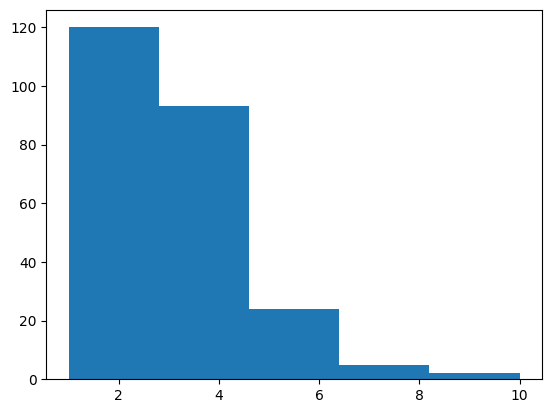

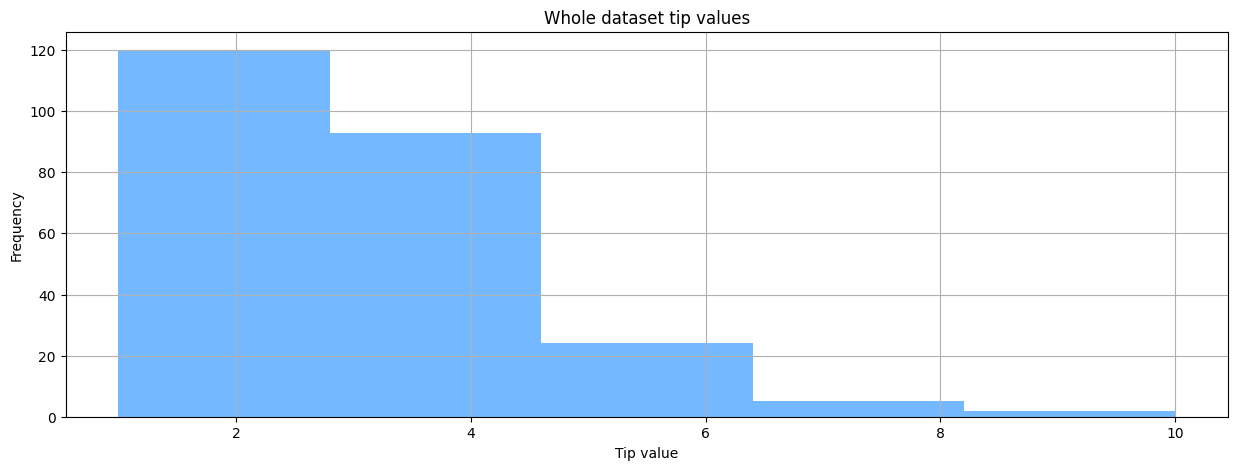

In [131]:
plt.hist(df.tip, bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(df.tip, bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Weekdays tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekdays tip values`
* Gridlines: `show`

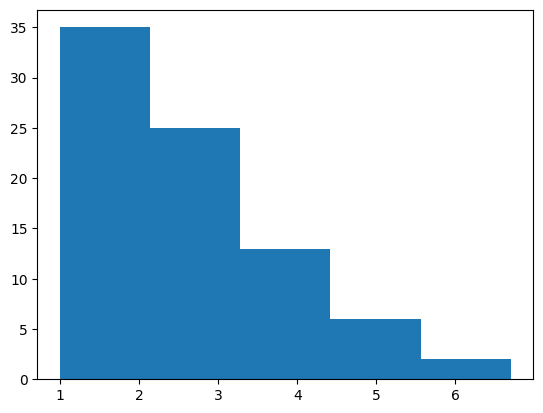

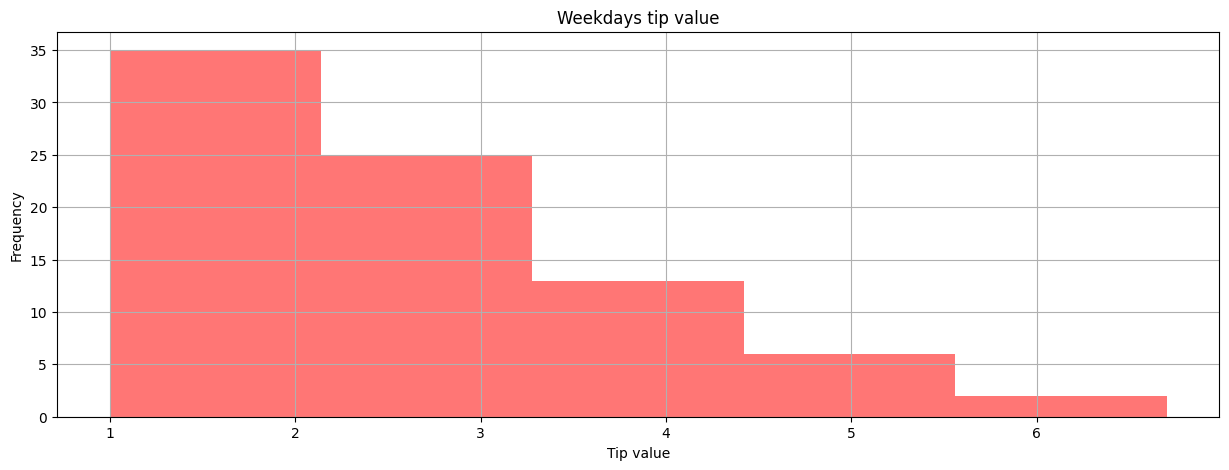

In [132]:
plt.hist(weekdays_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(weekdays_df['tip'], bins = 5, color = '#ff7675')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekdays tip value')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Weekends tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekends tip values`
* Gridlines: `show`

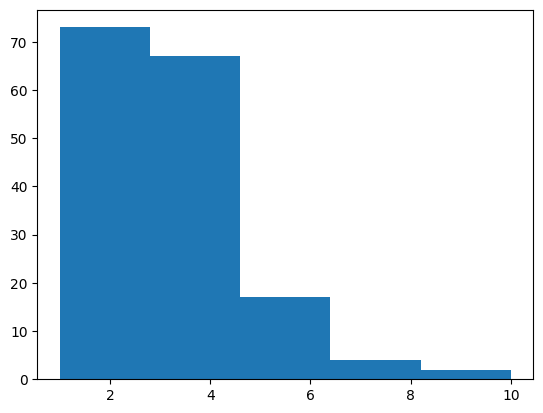

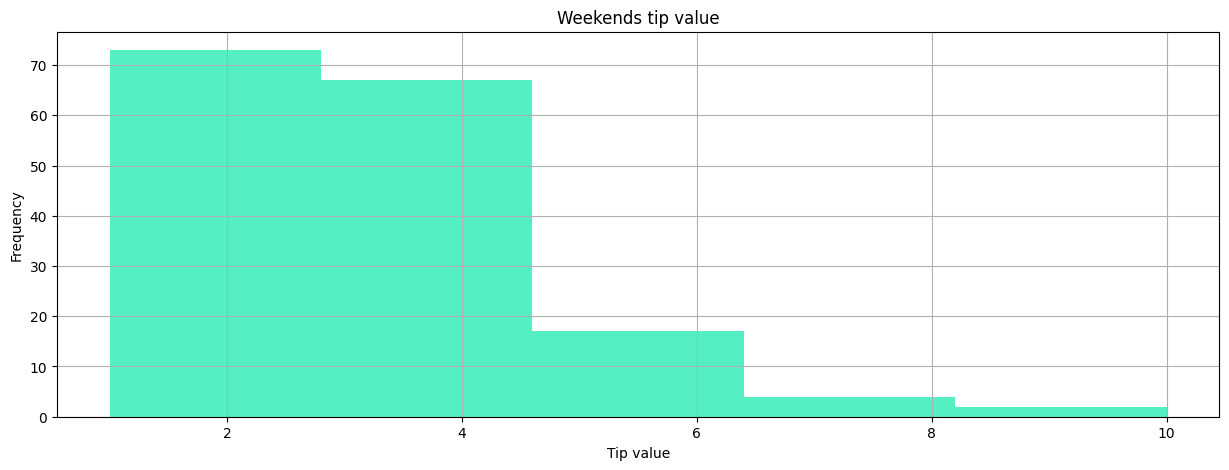

In [133]:
plt.hist(weekends_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(weekends_df['tip'], bins = 5, color = '#55efc4')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekends tip value')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Conclusion**

Plot all 3 charts in a row in the same cell:

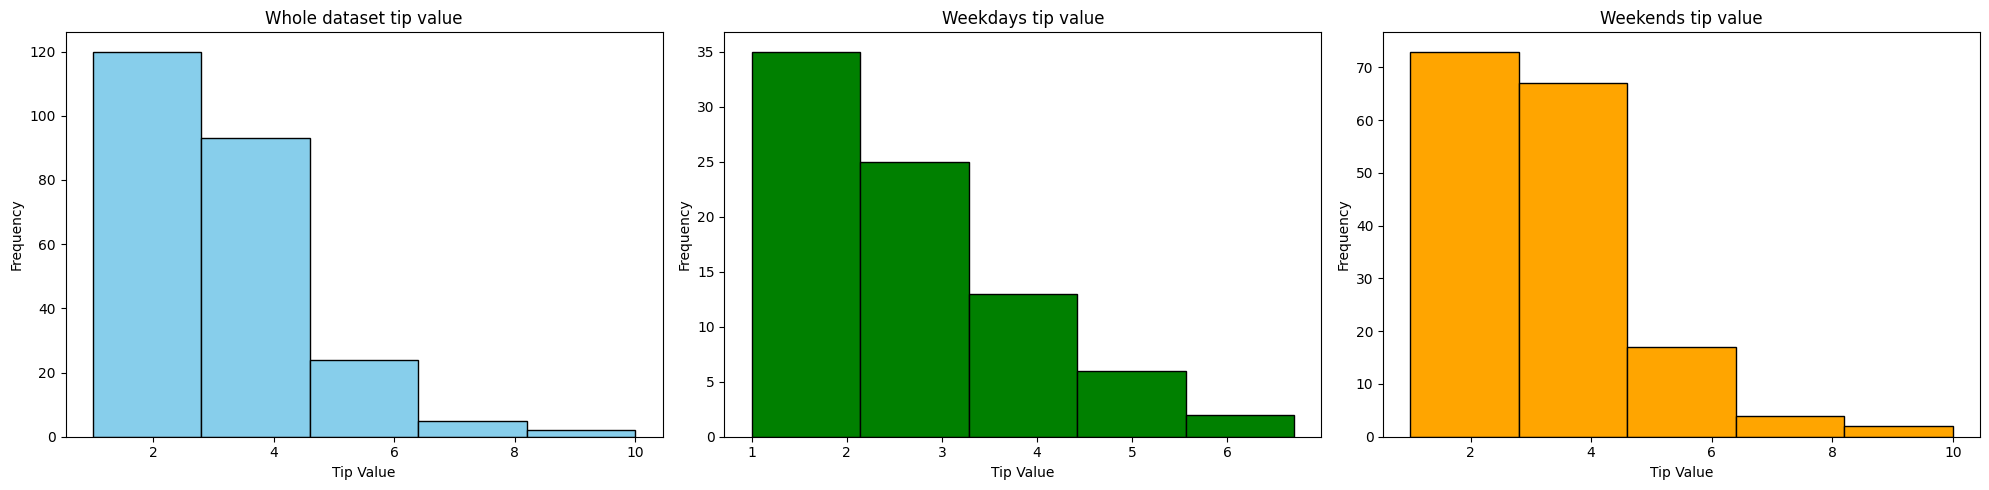

In [134]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot for all tips
axs[0].hist(df.tip, bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Whole dataset tip value')
axs[0].set_xlabel('Tip Value')
axs[0].set_ylabel('Frequency')


# Plot for smokers
axs[1].hist(weekdays_df['tip'], bins=5, color='green', edgecolor='black')
axs[1].set_title('Weekdays tip value')
axs[1].set_xlabel('Tip Value')
axs[1].set_ylabel('Frequency')

# Plot for non-smokers
axs[2].hist(weekends_df['tip'], bins=5, color='orange', edgecolor='black')
axs[2].set_title('Weekends tip value')
axs[2].set_xlabel('Tip Value')
axs[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

**Insights**

Customers tended to tip more and at higher prices on weekends. The average tip on weekends was 3.12 dollars, significantly higher than on weekdays (2.76 dollars). Additionally, weekend tips were twice as high as weekdays, with many tips exceeding 6 dollars — indicating more generous spending behavior on holidays. It could seem that days do affect tipping behavior.

### **🕑 Do dinners bring more tips?**

#### **Seperate lunch tips and dinner tips**

##### **Lunch**

Create a new dataframe lunch_df containing only info about lunch.

In [135]:
lunch_df=df[df['time']=='Lunch']

Output test sample:

In [136]:
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
147,147,11.87,1.63,Female,No,Thur,Lunch,2
128,128,11.38,2.0,Female,No,Thur,Lunch,2
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
83,83,32.68,5.0,Male,Yes,Thur,Lunch,2
134,134,18.26,3.25,Female,No,Thur,Lunch,2


##### **Dinner**

Create a new dataframe dinner_df containing only info about dinner

In [137]:
dinner_df=df[df['time']=='Dinner']

Output test samples:

In [138]:
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
115,115,17.31,3.5,Female,No,Sun,Dinner,2
210,210,30.06,2.0,Male,Yes,Sat,Dinner,3
170,170,50.81,10.0,Male,Yes,Sat,Dinner,3
185,185,20.69,5.0,Male,No,Sun,Dinner,5
233,233,10.77,1.47,Male,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

###### **Whole dataset**

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [139]:
df['tip'].min()
df['tip'].max()
df['tip'].mean()
df['tip'].median()

np.float64(2.9)

The resulting values for whole dataset:

In [140]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **Lunch tips**

* min => `lunch_tip_min`
* max => `lunch_tip_max`
* mean => `lunch_tip_mean`
* median => `lunch_tip_median`

In [142]:

lunch_tip_min=lunch_df['tip'].min()
lunch_tip_max=lunch_df['tip'].max()
lunch_tip_mean=lunch_df['tip'].mean()
lunch_tip_median=lunch_df['tip'].median()


The resulting values for lunch tips:

In [143]:
lunch_value = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
lunch_value = map(lambda x: round(x, 4), lunch_value)
lunch_mct = pd.DataFrame(lunch_value, index=['min', 'max', 'mean', 'median'])
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **Dinner**

* min => `dinner_tip_min`
* max => `dinner_tip_max`
* mean => `dinner_tip_mean`
* median => `dinner_tip_median`

In [147]:
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

The resulting values for dinner tips:

In [148]:
dinner_value = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
dinner_value = map(lambda x: round(x, 4), dinner_value)
dinner_mct = pd.DataFrame(dinner_value, index=['min','max', 'mean', 'median'])
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **Conclusion**

In [149]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Lunch,Dinner
min,1.000000,1.250000,1.00000
max,10.000000,6.700000,10.00000
mean,2.998279,2.728088,3.10267
median,2.900000,2.250000,3.00000


**Insights**

Customers tended to tip more at dinner. The average dinner tip wass 3.1 dollars and lunch was 2.73 dollars. The average and maximum tips were also significantly higher in the evening, suggesting more relaxed spending behavior during that time.


#### **Look at histograms**

##### **Whole dataset  tips histograms**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

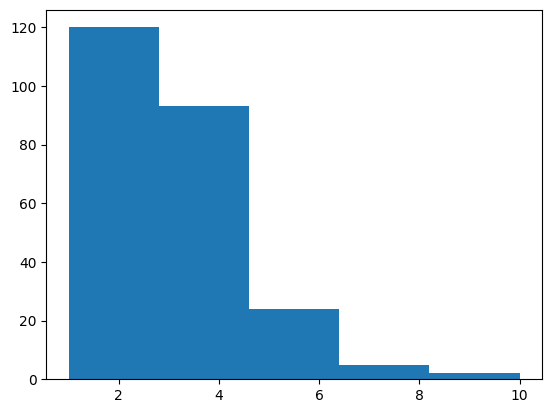

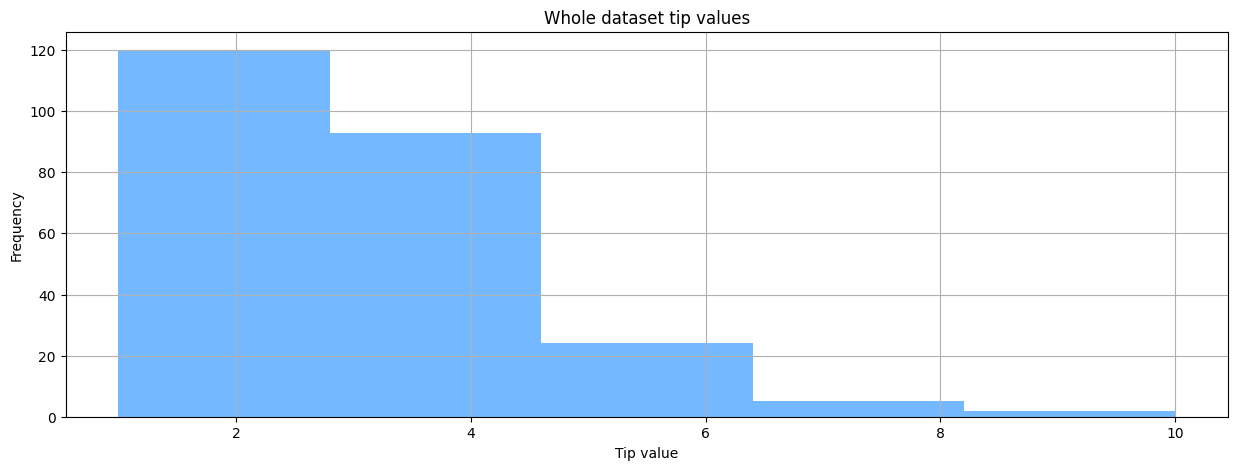

In [150]:
plt.hist(df.tip, bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(df.tip, bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Lunch tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Lunch tip values`
* Gridlines: `show`

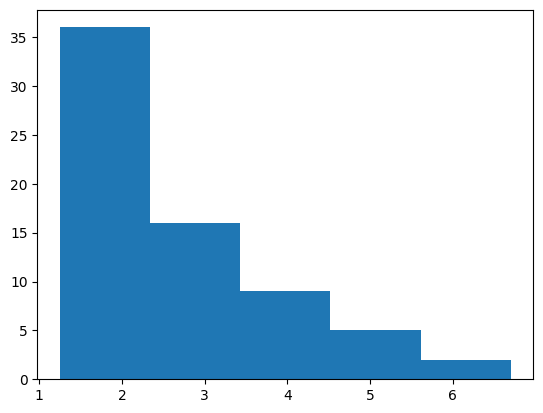

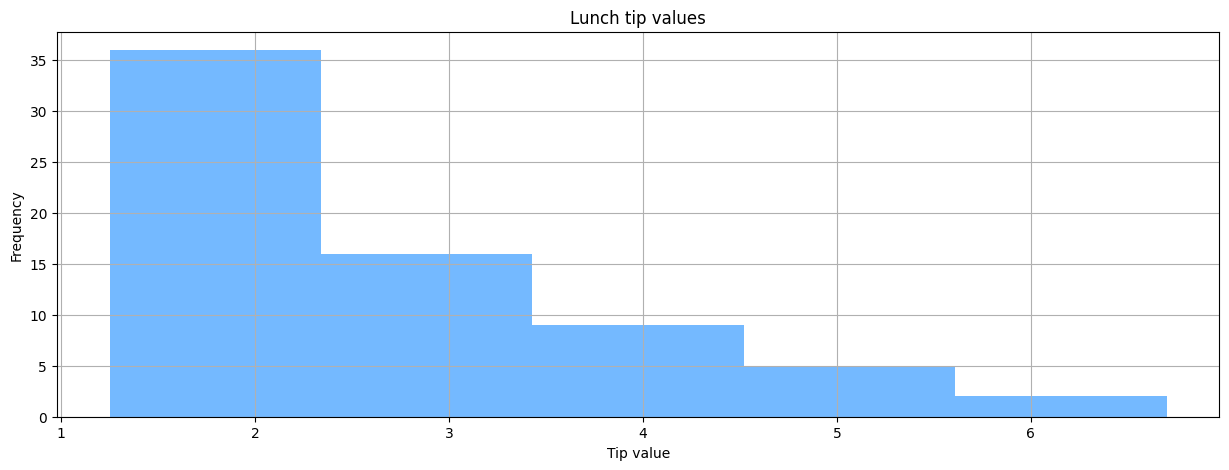

In [151]:
plt.hist(lunch_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(lunch_df['tip'], bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Lunch tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Dinner tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Dinnertip values`
* Gridlines: `show`

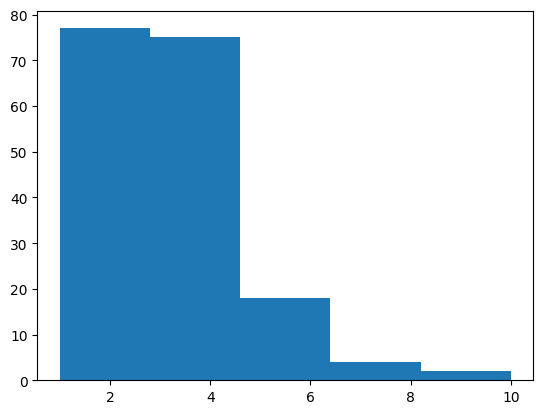

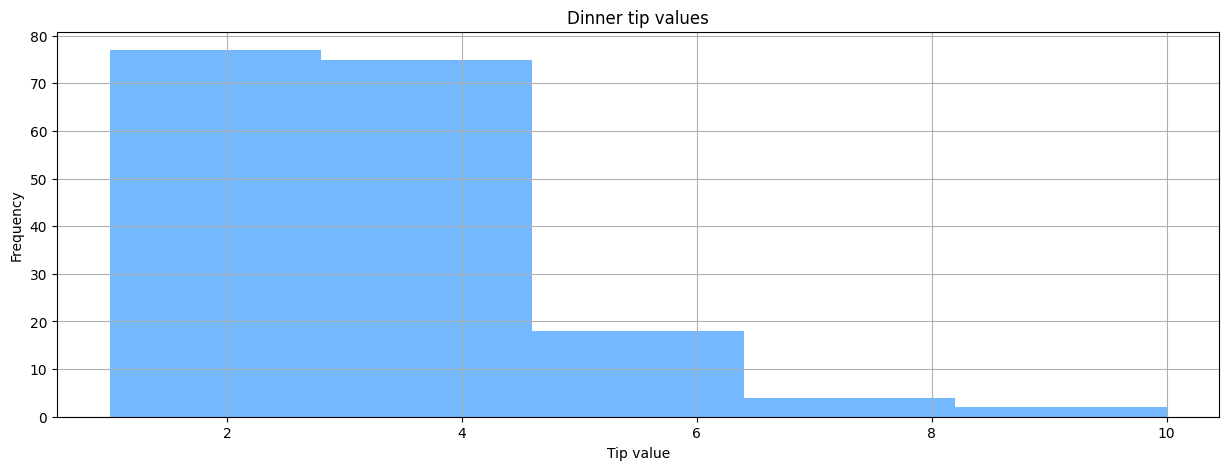

In [152]:
plt.hist(dinner_df['tip'], bins = 5)
# Set the size of the plot
plt.figure(figsize=(15, 5)) # Width: 15 inches, Height: 5 inches
# Set the color as a HEX
plt.hist(dinner_df['tip'], bins = 5, color = '#74b9ff')
# Set labels
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner tip values')
# Turning gridlines on
plt.grid(True)
plt.show()

##### **Conlusion**

Plot all 3 charts in a row in the same cell:

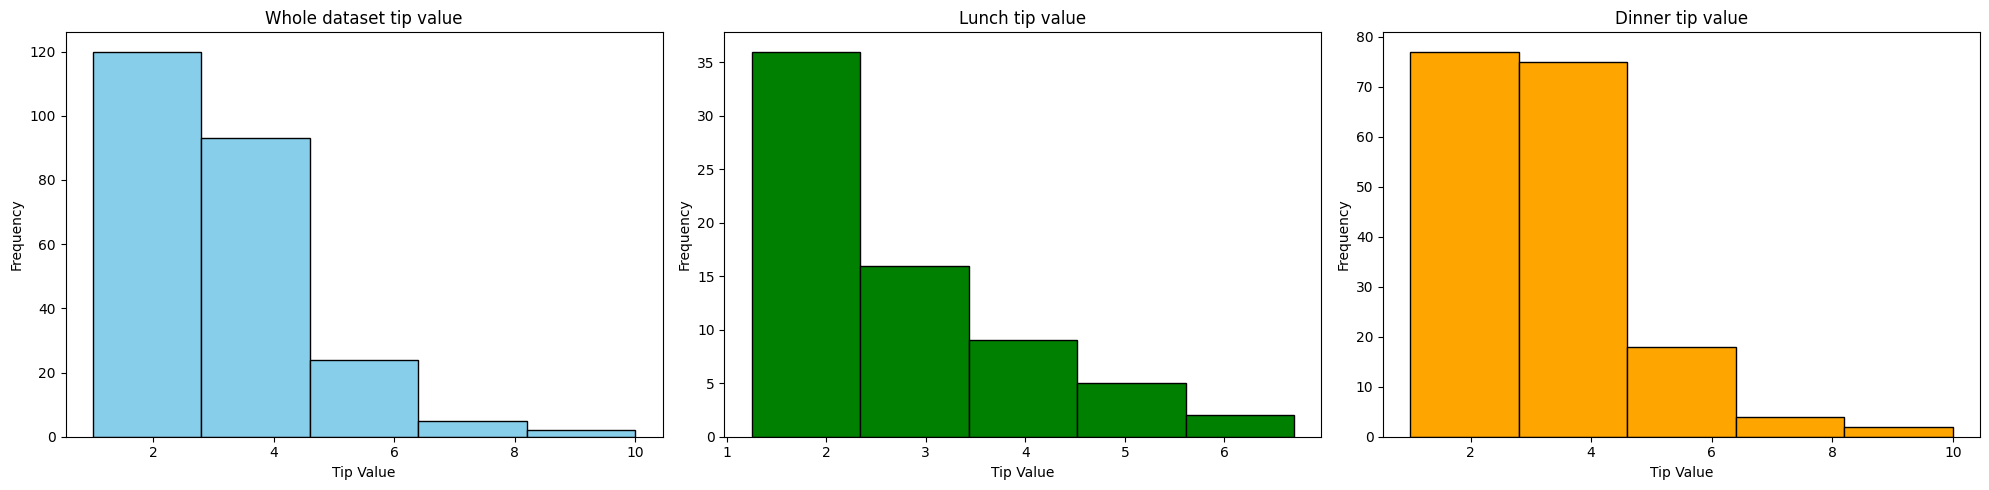

In [153]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot for all tips
axs[0].hist(df.tip, bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Whole dataset tip value')
axs[0].set_xlabel('Tip Value')
axs[0].set_ylabel('Frequency')


# Plot for smokers
axs[1].hist(lunch_df['tip'], bins=5, color='green', edgecolor='black')
axs[1].set_title('Lunch tip value')
axs[1].set_xlabel('Tip Value')
axs[1].set_ylabel('Frequency')

# Plot for non-smokers
axs[2].hist(dinner_df['tip'], bins=5, color='orange', edgecolor='black')
axs[2].set_title('Dinner tip value')
axs[2].set_xlabel('Tip Value')
axs[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

**Insights**

Dinner tipping was not only more usally, but also significantly higher than lunch. With an average tip of 3.10 dollars and a maximum of 10 dollars, dinner customers tended to be more generous. Meanwhile, lunch tipping was typically low, with very few people tipping more than 4 dollars.